## M2 - WEEK 5 | PROJECT
### Luke Barry

Being from Edmonton, Alberta, Canada, I am a big fam of the NHL team the Edmonton Oilers. The Oilers were once an amazing team and left our mark on the NHL in the during our "dynasty" era, winning the stanley cup in 1984, 1985, 1987, 1988 and 1990, thanks to Wayne Gretzky, the best player to put on a pair of skates. We have not won a cup since then, however, but the team has given its fans hope recently by acquiring a player who many see as the next Gretzky - Connor Macdavid. The Oilers have yet to see results, however, and speculators are calling for the team to restructure itself to be less focused on the superstar player. A general consensus from oilers speculators usually focuses on the need for better goaltending and better play-makers on defence.

This project will use data from the kaggle website to find the best goaltenders and defencemen based on stats that would be useful for the Oilers. Since the Oilers already thrive in penelty kill and powerplay situations, Goalies with strong even strength play will be given priority. The data sets gather performance stats from players and goalies in all games played in the last 6 years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

The data is seperated into stats for skaters, stats for goalies, and information on those players/goalies, such as what team they play for, their name, age, etc.

In [2]:
#pi = Player Info
#gd = Goalie Data
#sd = Skater Data

pi = pd.read_csv('player_info.csv')
gd = pd.read_csv('game_goalie_stats.csv')
sd = pd.read_csv('game_skater_stats.csv')

### Goalie Data

In [3]:
#Ensuring all data is in usable types.
gd.dtypes

game_id                         int64
player_id                       int64
team_id                         int64
timeOnIce                       int64
assists                         int64
goals                           int64
pim                             int64
shots                           int64
saves                           int64
powerPlaySaves                  int64
shortHandedSaves                int64
evenSaves                       int64
shortHandedShotsAgainst         int64
evenShotsAgainst                int64
powerPlayShotsAgainst           int64
decision                       object
savePercentage                float64
powerPlaySavePercentage       float64
evenStrengthSavePercentage    float64
dtype: object

In [4]:
gd.shape

(56656, 19)

Since the dataset consists many different games from different goalies, it is neccessary to average the stats out over for each player including every game they played. This brings our total down to 368 goalies as opposed to 56,656 games.

In [5]:
goalies = gd.groupby('player_id').mean().reset_index()
goalies.shape

(368, 18)

Since the Oilers have particularly strong powerplays and penelty kills, it would be benficial to find a goalie who is particularly strong in even strength scenarios.

The following code narrows down the dataframe to only those goalies with an average save percentage during even strength play that is higher than 85%, as well as an average of over 25 saves per game and average of 3500 min of ice time to ensure the data doesn't include back up goalies with a high save percentage due to only playing a few easy games. This narrows our Data down to 9 of the most suitable goal-tenders and excludes unnecessary cloumns.

In [6]:
goalies_neat = goalies[['player_id','evenStrengthSavePercentage','evenSaves',"timeOnIce"]]
a = goalies_neat['evenStrengthSavePercentage'] >= 85
b = goalies_neat[a]
c = b['evenSaves'] > 25
d = b[c]
e = d["timeOnIce"] > 3500
good_goalies = d[e]
good_goalies.shape

(9, 4)

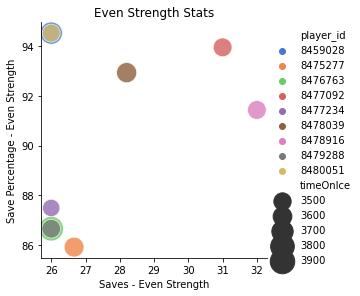

In [7]:
even_plot = sns.relplot(x="evenSaves", y="evenStrengthSavePercentage", hue="player_id", size="timeOnIce",
            sizes=(300, 600), alpha=.8, palette="muted", legend = 'brief',
            height=4, data=good_goalies)
even_plot.set(xlabel='Saves - Even Strength', ylabel='Save Percentage - Even Strength')
plt.title('Even Strength Stats')
plt.show()

This data will compare the data of the top even strength performers and include powerplays and penelty kill to ensure none of the top performers choke under the pressure of the penelty kill or are letting in unnecessary goals on the powerplay. The data reveals goalie number 8459028 to be the clear choice.

In [8]:
a = goalies['savePercentage'] >= 91
b = goalies[a]
c = b['saves'] > 25
d = b[c]
e = d["timeOnIce"] > 3500
final_cut_goalies = d[e]
fcg = final_cut_goalies[['player_id','savePercentage','saves','timeOnIce']]
fcg['savePercentage'] == sorted
fcg.head(5)

,player_id,savePercentage,saves,timeOnIce
40,8459028,94.761905,27.500000,3737.000000
134,8468685,91.125365,26.707635,3504.739292
172,8470645,91.021338,26.822388,3509.767164
197,8471679,91.246921,27.264434,3551.385681
301,8476883,91.413672,27.779476,3526.980349


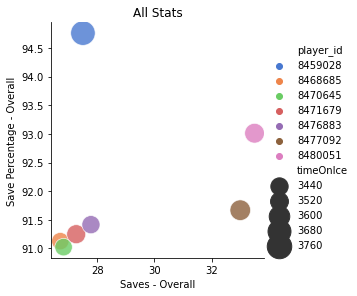

In [9]:
overall_plot = sns.relplot(x="saves", y="savePercentage", hue="player_id", size="timeOnIce",
            sizes=(300, 600), alpha=.8, palette="muted", legend = 'brief',
            height=4, data=fcg)
overall_plot.set(xlabel='Saves - Overall', ylabel='Save Percentage - Overall')
plt.title('All Stats')
plt.show()

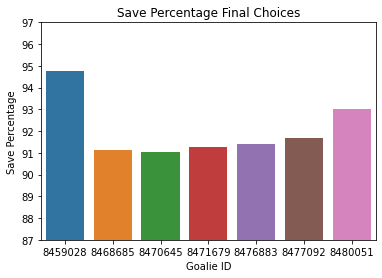

In [10]:
#pp (Percentage Plot)

pp = sns.barplot(x='player_id', y='savePercentage', data=fcg)
pp.yaxis.set_major_locator(ticker.MultipleLocator(1))
pp.yaxis.set_major_formatter(ticker.ScalarFormatter())
pp.set(xlabel='Goalie ID', ylabel='Save Percentage')
pp.set(ylim=(87, 97))
plt.title('Save Percentage Final Choices')
plt.show()

Further information can be found in the 'player_info' data set.

In [11]:
goalie_choice = pi.iloc[3211 , :3]
print(goalie_choice)

player_id    8459028
firstName       Marc
lastName     Lamothe
Name: 3211, dtype: object


## Defence Data

Since the data on what position the skaters play is located in the 'player_info' data and their performance is in the 'game_skater_stats' data, it is necessary to join the two data sets. The data is also given as all the games over the last 6 years played by the players so the data must be averaged to show the players average stats over those games.

In [12]:
players = sd.groupby('player_id').mean().reset_index()
joined_data = players.join(pi.set_index('player_id'), on='player_id')
joined_data.head()

,player_id,game_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8444894,2.000021e+09,13.000000,863.433333,0.200000,0.183333,1.100000,NaN,0.033333,0.000000,...,Adams,CAN,Nelson,LW,1963-08-15 01:00:00,BC,"6' 4""",193.04,196.0,L
1,8444919,2.001834e+09,7.199153,986.991525,0.156780,0.016949,0.737288,NaN,0.004237,0.055085,...,Albelin,SWE,Stockholm,D,1964-05-21 01:00:00,NaN,"6' 2""",187.96,195.0,L
2,8445000,2.001958e+09,12.528409,914.855114,0.210227,0.250000,1.977273,NaN,0.130682,0.122159,...,Andreychuk,CAN,Hamilton,LW,1963-09-29 01:00:00,ON,"6' 4""",193.04,225.0,R
3,8445176,2.001394e+09,11.084112,1004.275701,0.383178,0.275701,2.485981,NaN,0.121495,0.168224,...,Audette,CAN,Laval,RW,1969-09-23 01:00:00,QC,"5' 8""",172.72,191.0,R
4,8445266,2.001539e+09,21.936877,1094.445183,0.076412,0.023256,0.614618,NaN,0.000000,0.000000,...,Baron,CAN,Prince George,D,1967-06-01 01:00:00,BC,"6' 3""",190.50,236.0,L


In [13]:
joined_data.shape

(3353, 33)

The Oilers need a playmaker. Some key stats that suggest good play makers are assists, takeaway, and, to a lesser extent for defensemen, goals. I have gotten rid of all other unneccessary columns.

In [14]:
wanted_stats = joined_data[['player_id', 'assists', 'goals', 'shots', 'primaryPosition', 'takeaways']]
wanted_stats.shape

(3353, 6)

Below gets rid of the other positions other than defence included in the data.

In [15]:
x = wanted_stats['primaryPosition'] == 'D'
defence = wanted_stats[x]
defence.shape

(1138, 6)

Below filters the data based on the top performers according to assists and shots. Takeaways and goals were too limiting but will be compared in the following graphs.

In [16]:
c = defence['assists'] >= 0.6
d = defence[c]
e = d["shots"] >= 0.8
play_makers = d[e]
play_makers.shape

(8, 6)

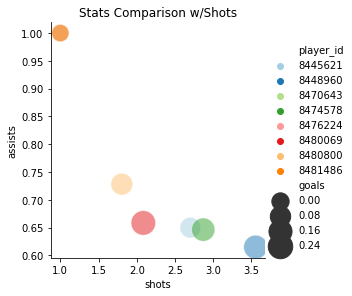

In [17]:
sns.relplot(x="shots", y="assists", hue="player_id", size="goals",
            sizes=(300, 600), alpha=.5, palette="Paired", legend = 'brief',
            height=4, data=play_makers)
plt.title("Stats Comparison w/Shots")
plt.show()

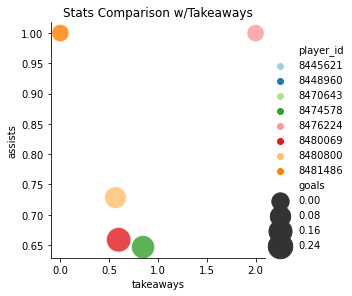

In [18]:
sns.relplot(x="takeaways", y="assists", hue="player_id", size='goals',
            sizes=(300, 600), alpha=.8, palette="Paired", legend = 'brief',
            height=4, data=play_makers)
plt.title("Stats Comparison w/Takeaways")
plt.show()

Narrowing down the data to top 3 performers according to previouisly analyzed stats who have at least an average of at least 1 assist/game

In [19]:
a = play_makers['assists'] >= 1
pm = play_makers[a]
pm.shape

(3, 6)

Our final bar graph reveals one obvious choice as out of all the defencemen with an average of 1 assist per game, one is averaging a much larger amount of takeaways than the other candidates.

In [20]:
pm.head()

,player_id,assists,goals,shots,primaryPosition,takeaways
1554,8470643,1.0,0.0,1.0,D,NaN
2508,8476224,1.0,0.0,1.0,D,2.0
3332,8481486,1.0,0.0,1.0,D,0.0


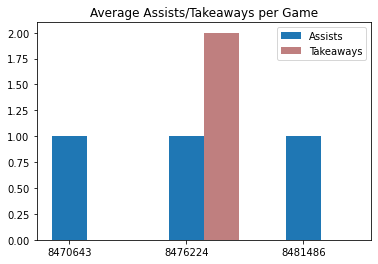

In [22]:
assists = [1,1,1]
takeaways = [0,2,0]
width = 0.3
pp =plt.bar(np.arange(len(assists)), assists, width=width, label='Assists')
pp =plt.bar(np.arange(len(takeaways))+ width, takeaways, width=width, alpha = .5, color = 'Maroon', label='Takeaways')
plt.xticks(np.arange(3), ['8470643', '8476224', '8481486'])
plt.title('Average Assists/Takeaways per Game')
plt.legend()
plt.show()

In [23]:
player_choice = pi.iloc[2055, :3]
print(player_choice)

player_id    8476224
firstName       Chay
lastName     Genoway
Name: 2055, dtype: object
